In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [2]:
clean_df = pd.read_csv('../data/processed/processed_data.csv')
clean_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1


## Making questions:

**Question 1:** Based on this dataset, How can we learn the general knowledge of stroke?

**Purpose of this question:** Give us general knowledge about stroke and raise people's awareness 

Step 1: We will represent the proportion and number of people who suffered from `Stroke` by using pie and bar chart. It will help us have a general view of this dataset.

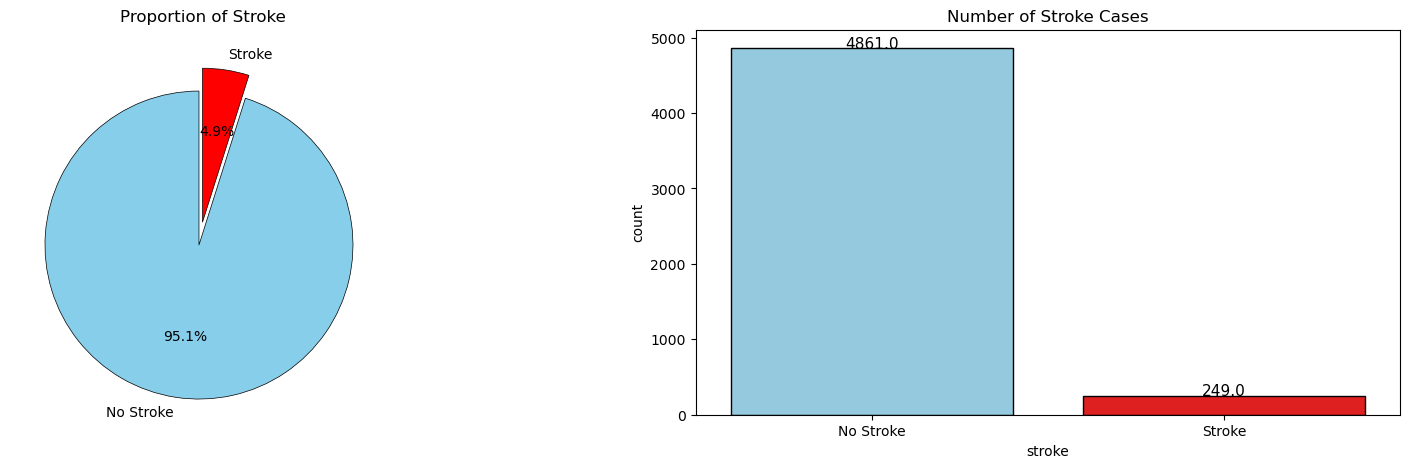

In [3]:
cross_tab = clean_df['stroke'].value_counts()
proportion = (cross_tab / len(clean_df) * 100).to_numpy()
colors = ['skyblue', 'red']

fig = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.subplot(1,2,1)
plt.pie(proportion,labels=['No Stroke', 'Stroke'],autopct='%1.1f%%',startangle=90,explode=(0.15,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Proportion of Stroke')

plt.subplot(1,2,2)
ax = sns.countplot(data=clean_df,x='stroke',palette=colors,edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke','Stroke'])
plt.title('Number of Stroke Cases');
plt.show()

**Observation:** In this dataset, the ratio of stroke is about 4.9% and the number of people who get stroke is 249 people. 

Step 2: we will show some means of each numeric columns by using `pd.describe()` and transpose it to easily extract this information

In [4]:
stroke_df, none_stroke_df = clean_df[clean_df['stroke'] == 1].describe().T, clean_df[clean_df['stroke'] == 0].describe().T

Step 3: we will visualize the information above for everyone can understand as well as observe it much more easily.

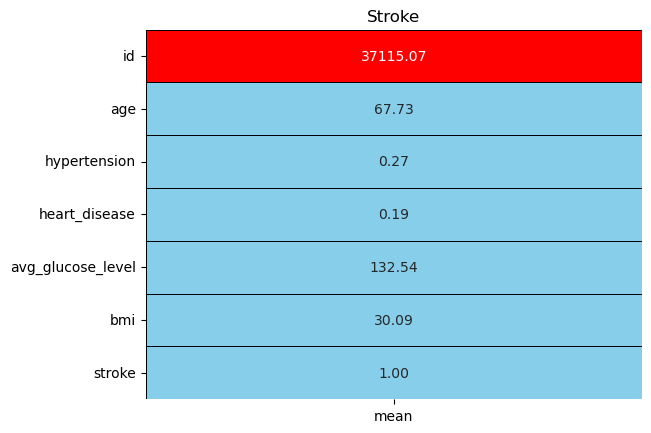

In [5]:
colors = ['skyblue','red']

sns.heatmap(stroke_df[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke');

**Observation**: As we can see that the average age to get stroke is about 68 which is pretty high so that it indicates that the old have more chances to get stroke than the others. Moreover, the average glucose level of a person to get stroke is about 132.54 and the average bmi is nearly 30 which means a person who is obesse is more likely to get stroke. And, it is apparently that the probability of hypertension and heart disease when a person get stroke is about 0.27 and 0.19, respectively.

Step 3: Next, we will create a dataframe of people who suffered from `Stroke` to analyze it more deeply.

In [6]:
stroke_df = clean_df[clean_df['stroke'] == 1]

Step 4: To get general knowledge about this issue, we will consider each factor in this dataset. However, factor age is a continuos values so that we will create a column with name `age_group` in this column we will classify a person who is in these bins: [0, 20, 40, 60, 100] then we create a column name `gender_age_group` which classify a person based on the information about `gender` and `age_group`. Finally, we will calculate the proportion of these classes in column`gender_age_group`.

In [7]:
clean_df['age_group'] = pd.cut(clean_df['age'], bins=[-1,20,40,60,100],labels=['0-20','21-40','41-60','61-100'])
clean_df = clean_df[clean_df['gender'] != 'Other']
clean_df['gender_age_group'] = clean_df['gender'].astype(str) + '_' + clean_df['age_group'].astype(str)
clean_df = clean_df.loc[clean_df['age_group'].notna(),:]
cross_tab = pd.crosstab(clean_df['gender_age_group'],clean_df['stroke'])
probability = cross_tab.div(cross_tab.sum(axis=1),axis=0)
female_props = probability.loc[probability.index.str.startswith('F'), :]
male_props = probability.loc[probability.index.str.startswith('M'), :]
female_props, male_props

(stroke                   0         1
 gender_age_group                    
 Female_0-20       0.996139  0.003861
 Female_21-40      0.992509  0.007491
 Female_41-60      0.962801  0.037199
 Female_61-100     0.869908  0.130092,
 stroke                   0         1
 gender_age_group                    
 Male_0-20         1.000000  0.000000
 Male_21-40        1.000000  0.000000
 Male_41-60        0.953704  0.046296
 Male_61-100       0.856354  0.143646)

Step 5: Visualize the information above using pie chart

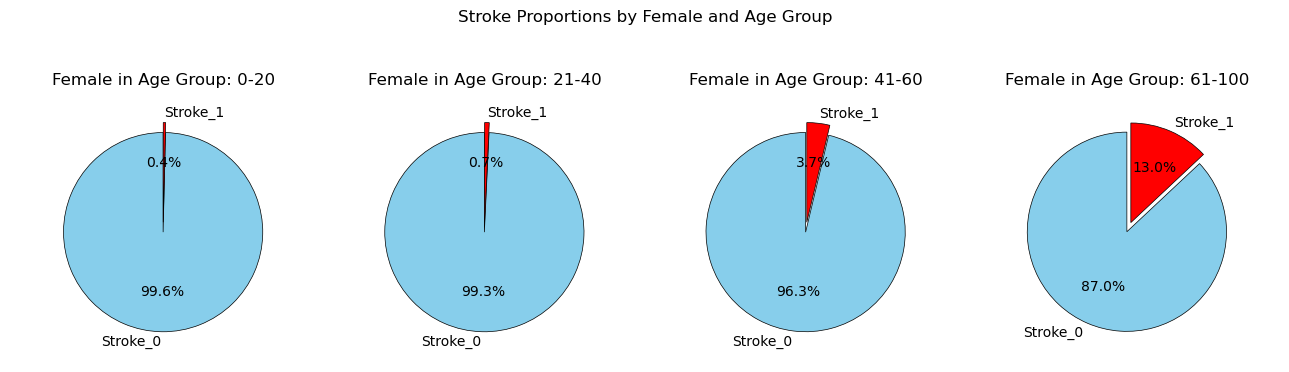

In [8]:
age_groups = ['0-20', '21-40', '41-60', '61-100']
fig, ax = plt.subplots(nrows=1,ncols=len(female_props.values),figsize=(13, 3.5))
plt.suptitle('Stroke Proportions by Female and Age Group', y=1.05)

for i, row in enumerate(female_props.values):
    ax[i].pie(row,labels=['Stroke_0', 'Stroke_1'],colors=colors,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True},explode=(0.1,0))
    ax[i].set_title(f'Female in Age Group: {age_groups[i]}')
    ax[i].axis('equal')

plt.tight_layout()
plt.show()

**Observation:** As we can see in female, the age group of 61-100 is more likely to get stroke than the others which is at 13%. Additionally, this figure is follow by the age group of 41-60 which is about 3.7%. In the other age groups, however; we still see that there is a small chance to get stroke about 1.1%, 0.7% for the age group of 21-40 and 0.4% for that of 0-20

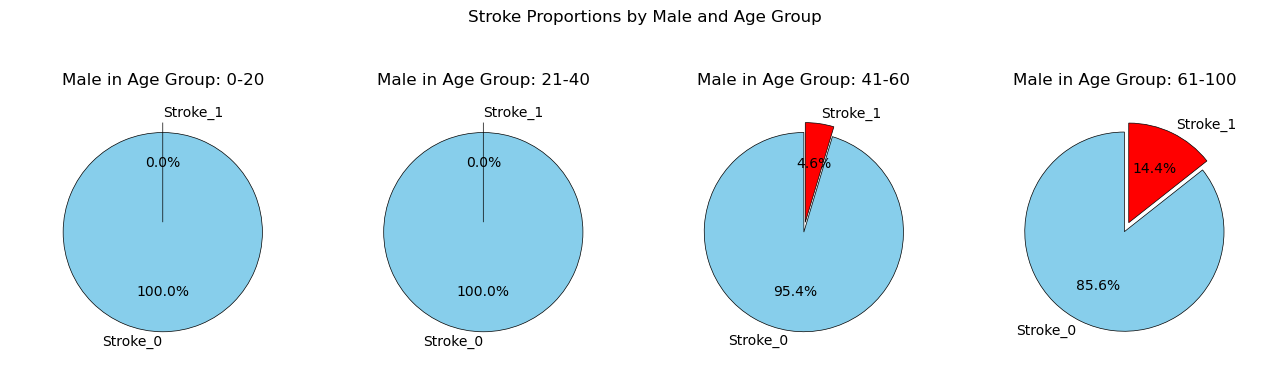

In [9]:
age_groups = ['0-20', '21-40', '41-60', '61-100']
fig, ax = plt.subplots(nrows=1,ncols=len(male_props.values),figsize=(13, 3.5))
plt.suptitle('Stroke Proportions by Male and Age Group', y=1.05)

for i, row in enumerate(male_props.values):
    ax[i].pie(row,labels=['Stroke_0', 'Stroke_1'],colors=colors,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True},explode=(0.1,0))
    ax[i].set_title(f'Male in Age Group: {age_groups[i]}')
    ax[i].axis('equal')

plt.tight_layout()
plt.show()

**Observation:** It is not perfectly similar to the female, people who can get stroke are at the age group of 40+, where the probability of stroke is at 4.6% and 14.4% for the 41-60 group and 61-100 group. However, we still have some general information that the older get more chance to suffer from stroke than the others.

Step 6: After representing factor `age`, we will keep considering the rest by calculate the proportion of them.

In [10]:
gender_prop = (stroke_df['gender'].value_counts() / len(stroke_df) * 100).to_numpy()
hypertension_prop = (stroke_df['hypertension'].value_counts() / len(stroke_df) * 100).to_numpy()
heart_disease_prop = (stroke_df['heart_disease'].value_counts() / len(stroke_df) * 100).to_numpy()
married_prop = (stroke_df['ever_married'].value_counts() / len(stroke_df) * 100).to_numpy()
work_type_prop = (stroke_df['work_type'].value_counts() / len(stroke_df) * 100).to_numpy()
residence_prop = (stroke_df['Residence_type'].value_counts() / len(stroke_df) * 100).to_numpy()
proportions = [gender_prop, hypertension_prop, heart_disease_prop, married_prop, work_type_prop, residence_prop]
proportions

[array([56.62650602, 43.37349398]),
 array([73.4939759, 26.5060241]),
 array([81.12449799, 18.87550201]),
 array([88.35341365, 11.64658635]),
 array([59.83935743, 26.10441767, 13.25301205,  0.80321285]),
 array([54.21686747, 45.78313253])]

Step 7: Visualize using pie chart

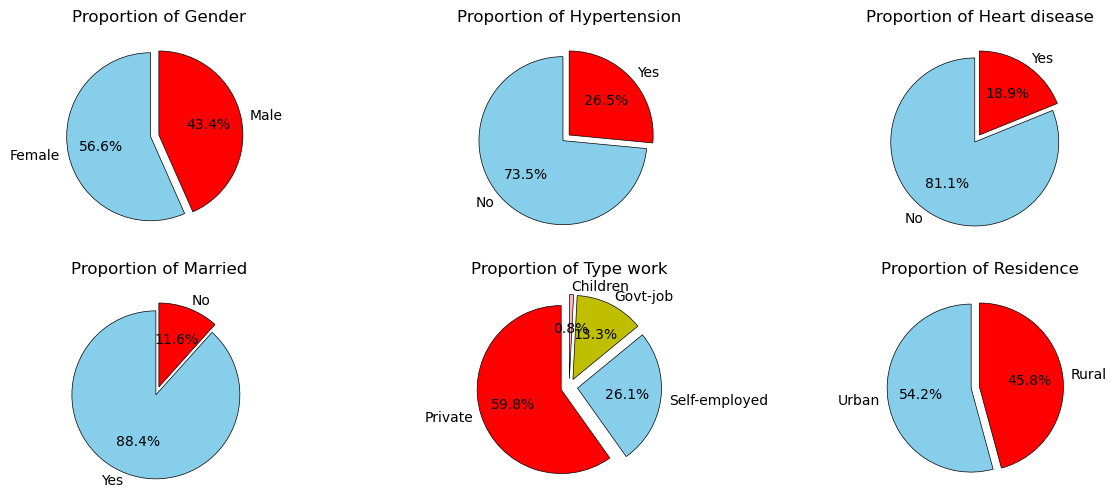

In [11]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,6))

ax[0,0].pie(proportions[0],labels=['Female', 'Male'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[0,0].set_title('Proportion of Gender')

ax[0,1].pie(proportions[1],labels=['No', 'Yes'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[0,1].set_title('Proportion of Hypertension')

ax[0,2].pie(proportions[2],labels=['No', 'Yes'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[0,2].set_title('Proportion of Heart disease')

ax[1,0].pie(proportions[3],labels=['Yes', 'No'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[1,0].set_title('Proportion of Married')

ax[1,1].pie(proportions[4],labels=['Private', 'Self-employed','Govt-job','Children'],autopct='%1.1f%%',startangle=90,explode=(0.1,0.1,0.1,0.1),colors=['r','skyblue','y','lightpink'],wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[1,1].set_title('Proportion of Type work')

ax[1,2].pie(proportions[5],labels=['Urban', 'Rural'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
ax[1,2].set_title('Proportion of Residence');

**Observation:**
- According to the graph, female is more likely to get stroke than male. (56.6%)
- From the above visualization, surprisingly, stroke cases were found more in patients who did not have any medical conditions like heart_disease or hypertension!
- Individuals who have married have more chance to get stroke than the other.
- About work_type, it is observed that there is more than 50% people who work for private are stroke, and this figure is followed by Self-employed and Govt-job has recorded a half and quarter of stroke cases.
- In term of accomodation, we see that the probability of stroke is higher in Urban than in Rural.